In [14]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch, SSNP, PPinvWrapper
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


In [2]:
X, y = make_blobs(n_samples=800, centers=4, n_features=30, random_state=42)
X = minmax_scale(X)
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# X = np.array(X)
# y = np.array(y)
# X = X.astype('float32') / 255.
# y = y.astype('int')
# X, _, y, _ = train_test_split(X, y, train_size=2000, test_size=2000, random_state=420)
# iris = load_iris()
# X = iris.data
# y = iris.target
# X = minmax_scale(X)

# clf = LogisticRegression()
# clf.fit(X, y)

In [3]:
# P = UMAP(n_components=2)

# # X2D = TSNE(n_components=2).fit_transform(X)
# X2D = P.fit_transform(X)
# plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
# Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# # Pinv = NNinv_torch()
# # Pinv = RBFinv()
# # Pinv = Pinv_ilamp()
# Pinv.fit(X2D, X)

# PPinv = SSNP()
PPinv = PPinvWrapper(UMAP(n_components=2), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2), RBFinv())
PPinv.fit(X=X, y=y)
X2D = PPinv.transform(X)

device:  cuda:0
Epoch 1/150, Loss: 0.07898088
Epoch 2/150, Loss: 0.05450042
Epoch 3/150, Loss: 0.03028728
Epoch 4/150, Loss: 0.01778747
Epoch 5/150, Loss: 0.00817661
Epoch 6/150, Loss: 0.00524101
Epoch 7/150, Loss: 0.00437939
Epoch 8/150, Loss: 0.00392924
Epoch 9/150, Loss: 0.00375415
Epoch 10/150, Loss: 0.00371197
Epoch 11/150, Loss: 0.00369144
Epoch 12/150, Loss: 0.00370246
Epoch 13/150, Loss: 0.00373731
Epoch 14/150, Loss: 0.00377829
Epoch 15/150, Loss: 0.00377019
Epoch 16/150, Loss: 0.00369450
Epoch 17/150, Loss: 0.00360753
Epoch 18/150, Loss: 0.00353685
Epoch 19/150, Loss: 0.00349065
Epoch 20/150, Loss: 0.00348966
Epoch 21/150, Loss: 0.00350189
Epoch 22/150, Loss: 0.00350129
Epoch 23/150, Loss: 0.00349199
Epoch 24/150, Loss: 0.00348256
Epoch 25/150, Loss: 0.00347769
Epoch 26/150, Loss: 0.00347540
Epoch 27/150, Loss: 0.00347425
Epoch 28/150, Loss: 0.00347172
Epoch 29/150, Loss: 0.00346818
Epoch 30/150, Loss: 0.00346367
Epoch 31/150, Loss: 0.00345906
Epoch 32/150, Loss: 0.00345489
E

In [4]:
builder = MapBuilder(PPinv, None, X2d=X2D, X=X, y=y, scaling=0.9)

n_classes: 4
150


Loss: 0.7615: 100%|██████████| 150/150 [00:00<00:00, 160.07it/s]


fast strategy
fast strategy
relace the label with the gradient
fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


fast strategy
fast strategy


<Axes: title={'center': 'label'}>

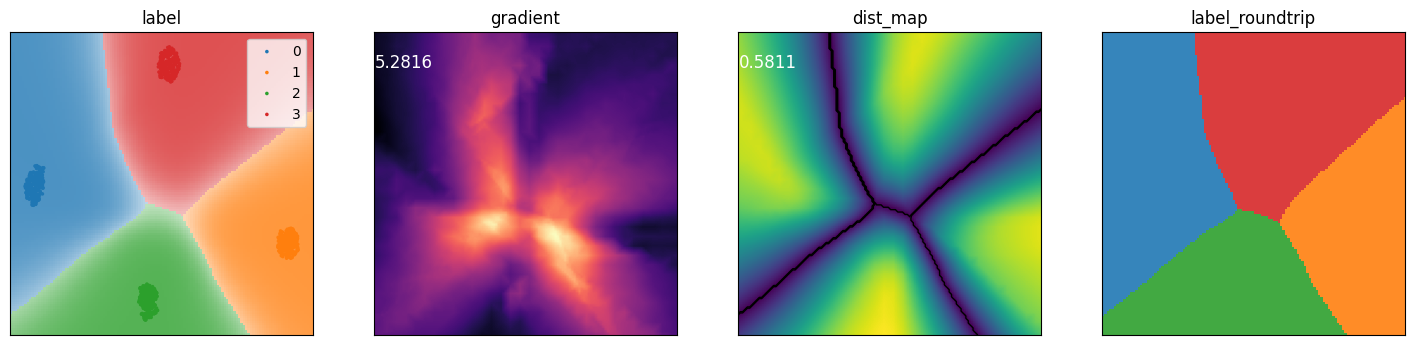

In [5]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

builder.plot_training_data(ax=ax[0])
# fig.savefig('figures/dummy.png', dpi=300)

In [6]:
# fig.savefig('figures/dummy.png', dpi=300)

slow strategy
slow strategy
slow strategy
slow strategy
slow strategy


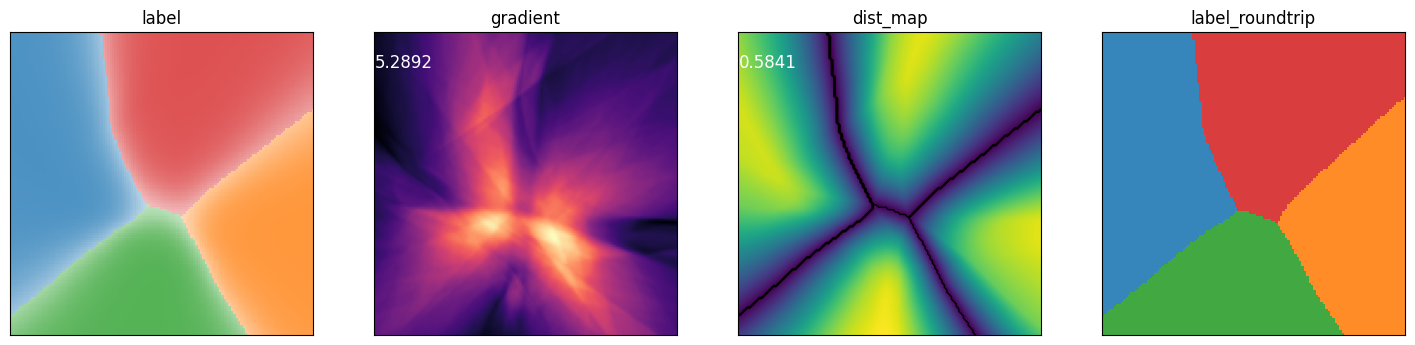

In [8]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = False
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

# fig.savefig('figures/fast.png', dpi=300)

slow strategy
fast strategy
relace the label with the gradient


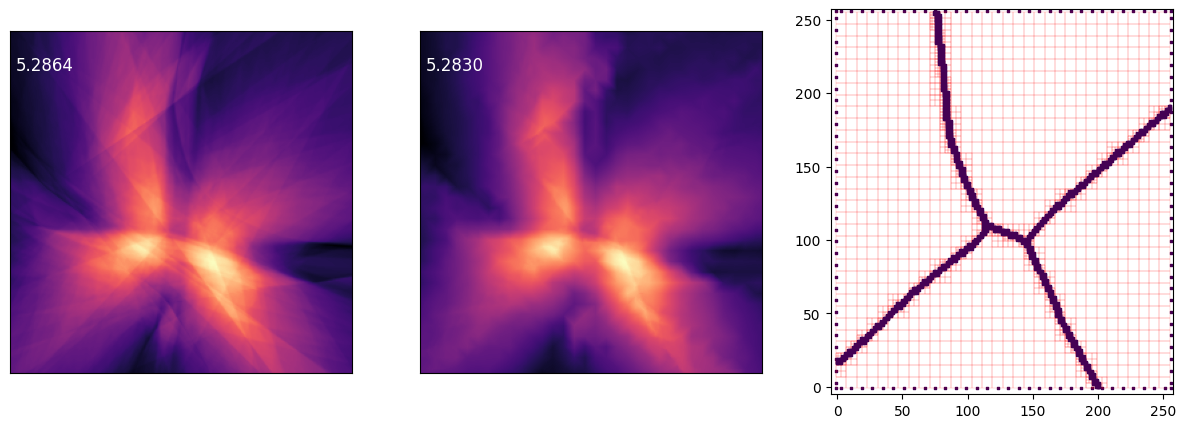

In [30]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
GRID = 256
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

threshold = 1
for item in sparse:
    if item[5] > threshold and item[4] > threshold:
        w, h = item[4], item[5]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

fig.savefig('results/figures/spares.pdf', dpi=300)


fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


fast strategy
fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


fast strategy


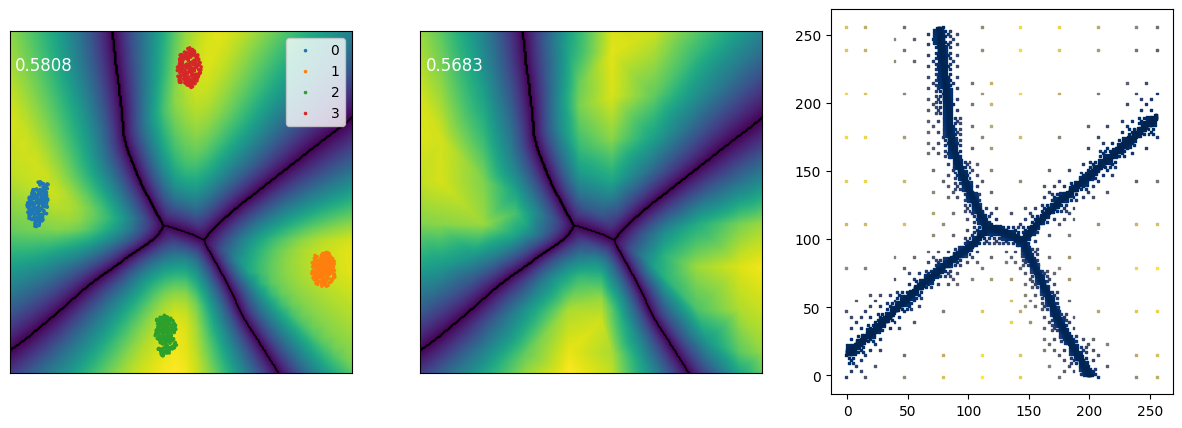

In [11]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_dist_map(ax[0],  fast=fast_strategy, grid=256)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=256, initial_resolution=8)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# fig.savefig('figures/spares.png', dpi=300)
